In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class GhostBuster:
    def __init__(self, ghostbuster_type, position="", ID=""):
        self.ghostbuster_type = ghostbuster_type  # Can be 'alien' or 'camper'
        self.position = position  # Initialized as empty
        self.ID = ID  # Initialized as empty

gb = GhostBuster("camper")
gb.__dict__

{'ghostbuster_type': 'camper', 'position': '', 'ID': ''}

Ghostbuster List:
Type: camper, ID: A, Position: 11
Type: camper, ID: B, Position: 14
Type: alien, ID: C, Position: 3
Type: alien, ID: D, Position: 16
(np.float64(5.0), np.float64(4.755282581475767), np.float64(4.045084971874737), np.float64(2.938926261462366), np.float64(1.5450849718747373), np.float64(3.061616997868383e-16), np.float64(-1.5450849718747368), np.float64(-2.938926261462365), np.float64(-4.045084971874736), np.float64(-4.755282581475767), np.float64(-5.0), np.float64(-4.755282581475768), np.float64(-4.045084971874738), np.float64(-2.9389262614623664), np.float64(-1.5450849718747377), np.float64(-9.184850993605148e-16), np.float64(1.5450849718747361), np.float64(2.9389262614623646), np.float64(4.045084971874736), np.float64(4.755282581475767))


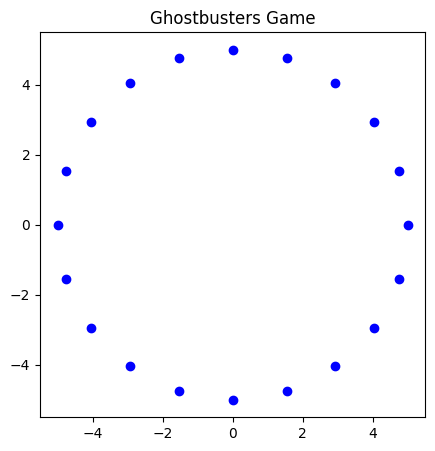

In [33]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np

# GhostBuster class definition
class GhostBuster:
    def __init__(self, ghostbuster_type, position="", ID=""):
        self.ghostbuster_type = ghostbuster_type  # Can be 'camper' or 'alien'
        self.position = position  # Initialized as empty
        self.ID = ID  # Initialized as empty

# gb_game_state class definition (Base class)
class gb_game_state:
    def __init__(self, num_campers, num_pairs, game_type):
        # Check if num_campers is greater than 26
        if num_campers > 26:
            raise ValueError("num_campers must be 26 or less.")
        
        # Check if num_pairs is greater than half of num_campers
        if num_pairs > num_campers // 2:
            raise ValueError("num_pairs must be less than or equal to half of num_campers.")
        
        # Check if num_campers is even
        if num_campers % 2 != 0:
            raise ValueError("num_campers must be an even integer.")
        
        self.num_campers = num_campers  # Even integer
        self.num_pairs = num_pairs
        self.type = game_type  # Either "random" or "manual"
        self.game_ID = self.generate_game_id()  # Random string generated on init
        self.ghostbusters = []  # list containing all ghostbusters instances
        self.campers = []  # list containing all ghostbusters instances with type "camper"
        self.aliens = []  # list containing all ghostbusters instances with type "alien"
        self.camper_location_dict = {}
        self.game_letters = string.ascii_uppercase[:self.num_campers]

    def generate_game_id(self):
        # Generate a random string of 8 characters for the game ID
        return ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))
    
    def create_ghostbusters(self):
        letter_index = 0
        
        # Create one camper and one alien ghostbuster for each pair
        for _ in range(self.num_pairs):
            # Create one camper ghostbuster and assign an ID using letters
            camper_id = self.game_letters[letter_index]
            camper_ghostbuster = GhostBuster('camper', ID=camper_id)
            self.ghostbusters.append(camper_ghostbuster)
            self.campers.append(camper_ghostbuster)
            letter_index += 1

        for _ in range(self.num_pairs):    
            # Create one alien ghostbuster and assign an ID using letters
            alien_id = self.game_letters[letter_index]
            alien_ghostbuster = GhostBuster('alien', ID=alien_id)
            self.ghostbusters.append(alien_ghostbuster)
            self.aliens.append(alien_ghostbuster)
            letter_index += 1
    
    def set_ghostbuster_positions_rand(self):
        # Generate a list of unique random positions
        unique_positions = random.sample(range(self.num_campers), self.num_campers)
        
        # Assign positions to ghostbusters
        for i, ghostbuster in enumerate(self.ghostbusters):
            ghostbuster.position = unique_positions[i]

# New gb_game_rep class using composition (holds an instance of gb_game_state)
class gb_game_rep:
    def __init__(self, game_state):
        # Store the game_state instance in the gb_game_rep class
        self.game_state = game_state
        
        # Additional attribute for the representation of the game
        self.game_representation = {}

    # New method to create a representation (for example, by storing IDs and positions)
    def create_game_rep(self):
        # Build a representation based on ghostbusters' types and positions
        self.game_representation = {
            'campers': [(gb.ID, gb.position) for gb in self.game_state.campers],
            'aliens': [(gb.ID, gb.position) for gb in self.game_state.aliens]
        }

    # Method to display the ghostbusters and the game representation
    def display_game_state(self):
        # Output the ghostbuster types, IDs, and positions
        print("Ghostbuster List:")
        for gb in self.game_state.ghostbusters:
            print(f"Type: {gb.ghostbuster_type}, ID: {gb.ID}, Position: {gb.position}")
        
        # Plot a circle with the number of points equal to num_campers
        self.plot_circle()

    # Plot method to represent campers and aliens on a circle
    def plot_circle(self,radius = 5):
        num_dots = self.game_state.num_campers
        angles = np.linspace(0, 2 * np.pi, num_dots, endpoint=False)

        x_positions = radius * np.cos(angles)
        y_positions = radius * np.sin(angles)

        dot_dict = {i: (x_positions[i], y_positions[i]) for i in range(num_dots)}
    
        dot_positions = list(dot_dict.values())
        x_positions, y_positions = zip(*dot_positions)

        # define colors using game state
        campers = self.game_state.campers
        camper_pos = [c.position for c in campers]

        aliens = self.game_state.aliens
        alien_pos = [a.position for a in aliens]

        

        print(x_positions)
        plt.figure(figsize=(5, 5))
        plt.plot(x_positions, y_positions, 'bo')  # Blue dots
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f'Ghostbusters Game')
        plt.show()


# Example usage
try:
    # Initialize gb_game_state
    game_state = gb_game_state(20, 2, "random")
    game_state.create_ghostbusters()
    game_state.set_ghostbuster_positions_rand()

    # Initialize gb_game_rep with game_state
    game_rep = gb_game_rep(game_state)

    # Create and display game representation
    game_rep.create_game_rep()
    game_rep.display_game_state()

    
except ValueError as e:
    print(e)


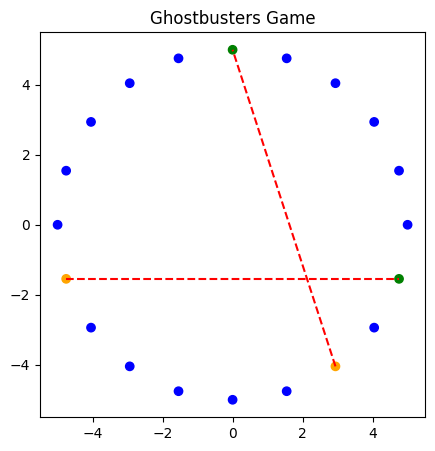

,POSITION,ANGLES,XPOS,YPOS,CAMPER_IND,ALIEN_IND,COLOR
0,0,0.000000,5.000000e+00,0.000000e+00,0,0,blue
1,1,0.314159,4.755283e+00,1.545085e+00,0,0,blue
2,2,0.628319,4.045085e+00,2.938926e+00,0,0,blue
3,3,0.942478,2.938926e+00,4.045085e+00,0,0,blue
4,4,1.256637,1.545085e+00,4.755283e+00,0,0,blue
5,5,1.570796,3.061617e-16,5.000000e+00,0,1,green
6,6,1.884956,-1.545085e+00,4.755283e+00,0,0,blue
7,7,2.199115,-2.938926e+00,4.045085e+00,0,0,blue
8,8,2.513274,-4.045085e+00,2.938926e+00,0,0,blue
9,9,2.827433,-4.755283e+00,1.545085e+00,0,0,blue


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def create_game_rep(num_campers, aliens=[19, 5], campers=[11, 17]):
    # Create a DataFrame to hold positions
    df = pd.DataFrame(np.arange(0, num_campers), columns=['POSITION'])
    df['ANGLES'] = np.linspace(0, 2 * np.pi, df.shape[0], endpoint=False)
    df['XPOS'] = 5 * np.cos(df['ANGLES'])
    df['YPOS'] = 5 * np.sin(df['ANGLES'])

    # Initialize camper indicator
    df['CAMPER_IND'] = 0  # Use 0 as the default indicator
    df.loc[campers, 'CAMPER_IND'] = 1  # Set 1 for campers

    # Initialize alien indicator
    df['ALIEN_IND'] = 0  # Use 0 as the default indicator
    df.loc[aliens, 'ALIEN_IND'] = 1  # Set 1 for aliens

    # Assign colors based on indicators
    df['COLOR'] = 'blue'  # Default color
    df.loc[df['ALIEN_IND'] == 1, 'COLOR'] = 'green'  # Set color for aliens
    df.loc[df['CAMPER_IND'] == 1, 'COLOR'] = 'orange'  # Set color for campers

    # Create color list for plotting
    colors = df['COLOR'].tolist()

    # Create the scatter plot
    plt.figure(figsize=(5, 5))
    plt.scatter(df['XPOS'], df['YPOS'], c=colors)  # Use the colors list
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f'Ghostbusters Game')
    
    # NEXT STEP: MAKE MORE DYNAMIC

    # Connect two specific points with a line
    point1 = df.loc[campers[0]]  # First camper position
    point2 = df.loc[aliens[0]]   # First alien position

    point3 = df.loc[campers[1]]  # First camper position
    point4 = df.loc[aliens[1]]   # First alien position
    
    # Use plt.plot to connect the points
    plt.plot([point1['XPOS'], point2['XPOS']], [point1['YPOS'], point2['YPOS']], color='red', linestyle='--')  # Red dashed line

    plt.plot([point3['XPOS'], point4['XPOS']], [point3['YPOS'], point4['YPOS']], color='red', linestyle='--')  # Red dashed line
    
    plt.show()
    
    return df

# Call the function
create_game_rep(20)


In [8]:
game1 = gb_game_state(num_campers=20,num_pairs=2,game_type="random")
game1.create_ghostbusters()
game1.__dict__
game1.aliens[1].ID

'D'

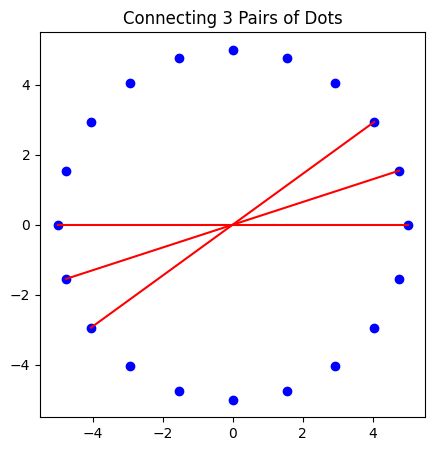

In [32]:
# Modify the class to include dot_dict, which maps each dot's index to its position as a dictionary.

class CircleOfDots:
    def __init__(self, radius, num_dots, num_pairs=2):
        """
        Initialize the circle with a given radius, number of dots, number of pairs to connect,
        and create dot_dict as a dictionary mapping each dot to its position.
        
        :param radius: The radius of the circle
        :param num_dots: Number of evenly spaced dots around the circle
        :param num_pairs: Number of pairs of dots to connect with red lines (default is 2)
        """
        self.radius = radius
        self.num_dots = num_dots
        self.num_pairs = num_pairs
        self.angles = np.linspace(0, 2 * np.pi, num_dots, endpoint=False)  # Divide the circle evenly
        self.dot_dict = self.create_dot_dict()  # Create dot_dict

    def create_dot_dict(self):
        """
        Create a dictionary that maps each dot's index to its (x, y) position.
        
        :return: A dictionary with dot index as key and (x, y) position as value
        """
        x_positions = self.radius * np.cos(self.angles)
        y_positions = self.radius * np.sin(self.angles)
        return {i: (x_positions[i], y_positions[i]) for i in range(self.num_dots)}

    def plot_circle(self):
        """
        Plot the circle with the dots on it.
        """
        dot_positions = list(self.dot_dict.values())
        x_positions, y_positions = zip(*dot_positions)

        plt.figure(figsize=(5, 5))
        plt.plot(x_positions, y_positions, 'bo')  # Blue dots
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f'Circle with {self.num_dots} Dots')
        plt.show()

    def connect_pairs(self):
        """
        Connect num_pairs of dots on the circle with red lines.
        The pairs are selected by connecting each dot with the dot opposite to it on the circle.
        """
        dot_positions = list(self.dot_dict.values())
        
        x_positions, y_positions = zip(*dot_positions)

        # Plot the circle and dots
        plt.figure(figsize=(5, 5))
        plt.plot(x_positions, y_positions, 'bo')  # Blue dots

        # Connect num_pairs of dots
        for i in range(self.num_pairs):
            dot1 = dot_positions[i]
            dot2 = dot_positions[(i + self.num_dots // 2) % self.num_dots]  # Opposite dot
            plt.plot([dot1[0], dot2[0]], [dot1[1], dot2[1]], 'r-')  # Red line

        # Set aspect and title
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title(f'Connecting {self.num_pairs} Pairs of Dots')
        plt.show()


# Example usage
circle = CircleOfDots(radius=5, num_dots=20, num_pairs=3)
circle.connect_pairs()  # The dictionary mapping dots to their positions



### Next Steps
- add method to game state to identify targets for campers (i.e. first camper fires at first alien, etc)
- make plotting method in game_rep_class dynamic for number of pairs
- mathematically determine intersection between 2 lines
- simulate with random locations of A, B, C, D (bonus points for full mathematical solution)
- end product: an app that visualizes game and records results to database